**Business Issue Understanding**

######Answering key questions to guide our analysis

*1. Para quem estou trabalhando?*

R: Negócio de distribuição que opera com diferentes categorias de produtos e possui uma base de mais de 1500 clientes

*2. O que essa pessoa precisa?*

R: Conhecer melhor os diferentes perfis e hábitos de compras de sua base de clientes

*3. O que é importante?*

R: Identificar e agrupar os clientes com base no comportamento individual de cada um deles

*4 Por que isso é importante?*

R: Saber como os clientes se relacionam com o negócio ajuda a empresa a traçar objetivos específicos definir ações mais focadas e assertivas para cada grupo de cliente

*5 * Como isso gera valor?*

R: Melhoria do engajamento dos clientes e incremento de receita




**Data Undestading**


In [1]:
#importing libraries

import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from ipywidgets import interactive


%matplotlib inline


In [2]:
#data reading and checking

data = pd.read_csv('https://raw.githubusercontent.com/oliveiraqalan/ProjetoAwari/master/superstore_dataset.csv',encoding='cp1252')
df = pd.DataFrame(data)
print("Read %d samples from the dataset"%len(df))
df.head()


Read 51290 samples from the dataset


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,NaN,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [3]:
#Checking amount of records for each Segment
for c in df['Segment'].unique():
  print('Segment', c, 'has',(df['Segment']== c).sum(), 'samples')


Segment Consumer has 26518 samples
Segment Home Office has 9343 samples
Segment Corporate has 15429 samples


In [4]:
#Checking dtype of each column
for c in df.columns:
  print('Data type of column', c, 'is',df[c].dtype)

Data type of column Row ID is int64
Data type of column Order ID is object
Data type of column Order Date is object
Data type of column Ship Date is object
Data type of column Ship Mode is object
Data type of column Customer ID is object
Data type of column Customer Name is object
Data type of column Segment is object
Data type of column City is object
Data type of column State is object
Data type of column Country is object
Data type of column Postal Code is float64
Data type of column Market is object
Data type of column Region is object
Data type of column Product ID is object
Data type of column Category is object
Data type of column Sub-Category is object
Data type of column Product Name is object
Data type of column Sales is float64
Data type of column Quantity is int64
Data type of column Discount is float64
Data type of column Profit is float64
Data type of column Shipping Cost is float64
Data type of column Order Priority is object


**Data Transformation and Cleansing**


In [5]:
#transforming dtype of Order Date and Ship Date to Date type

df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df.dtypes

Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
City                      object
State                     object
Country                   object
Postal Code              float64
Market                    object
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority            object
dtype: object

In [6]:
#Checking if there'is any null value in each column

any_null =[]
columns =['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority']

for col in columns:
  any_null.append(any(df[col].isnull()))

if any(any_null):
  print('Those columns have Null Values:',
        [c for c, n in zip(columns, any_null) if n is True])
else:
  print('There are no Null Values')

Those columns have Null Values: ['Postal Code']


In [7]:
#Checking how many Null Values does column 'Postal Code' has

print('Postal Code has',df['Postal Code'].isnull().sum(), '/',len(df),'null values')


Postal Code has 41296 / 51290 null values


In [8]:
#Dropping 'Postal Code'

df.drop('Postal Code', axis=1, inplace=True)
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium
2,48883,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High
3,11731,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High
4,22255,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,32593,CA-2014-115427,2014-12-31,2015-04-01,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,United States,US,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51286,47594,MO-2014-2560,2014-12-31,2015-05-01,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,Morocco,Africa,Africa,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
51287,8857,MX-2014-110527,2014-12-31,2015-02-01,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,Nicaragua,LATAM,Central,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,6852,MX-2014-114783,2014-12-31,2015-06-01,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,Mexico,LATAM,North,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium


**Data Exploration**

In [9]:
#Descriptive Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,51290.0,25645.500000,14806.291990,1.000,12823.250000,25645.500,38467.7500,51290.000
Sales,51290.0,246.490581,487.565361,0.444,30.758625,85.053,251.0532,22638.480
Quantity,51290.0,3.476545,2.278766,1.000,2.000000,3.000,5.0000,14.000
Discount,51290.0,0.142908,0.212280,0.000,0.000000,0.000,0.2000,0.850
Profit,51290.0,28.610982,174.340972,-6599.978,0.000000,9.240,36.8100,8399.976
Shipping Cost,51290.0,26.375915,57.296804,0.000,2.610000,7.790,24.4500,933.570


In [10]:
#Creating a new dataset with only the necessary columns

col_excluded =['Row ID', 'Ship Date', 'Ship Mode',
       'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority']

df_orders = df.drop(col_excluded, axis=1)
df_by_orders = df_orders.groupby(['Customer ID', 'Order ID']).agg({'Order Date':'max','Sales':'sum','Quantity':'sum'})

#Adding Recency and Frequency columns

df_by_orders['Recency']=max(df['Order Date'])-df_by_orders['Order Date']
df_by_orders['Frequency']=1

#Grouping by customers

customers = df_by_orders.groupby(['Customer ID']).agg({'Sales':'sum','Quantity':'sum','Recency':'min','Frequency':'sum'})

In [11]:
#Removing Quantity column and and changing Recency dtype

customers.drop('Quantity',axis=1, inplace=True)
customers['Recency'] = customers['Recency'].dt.days
print(customers['Recency'].dtype)

int64


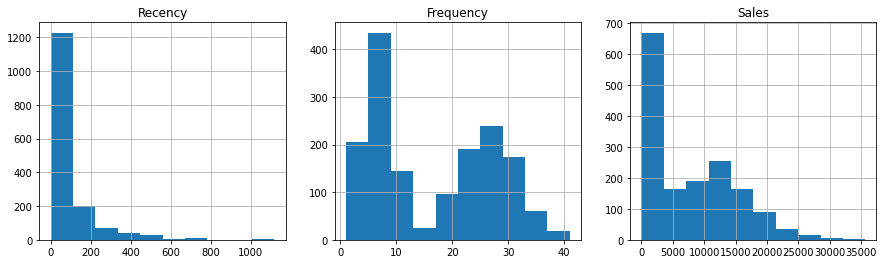

In [12]:
#Visualizing data distribution of each column

fig = plt.figure(figsize=[15,4])
axe1 = fig.add_subplot(1,3,1)
plt.hist(customers.Recency)
plt.title('Recency')
plt.grid(axis='both')
axe2 = fig.add_subplot(1,3,2)
plt.hist(customers.Frequency)
plt.title('Frequency')
plt.grid(axis='both')
axe3 = fig.add_subplot(1,3,3)
plt.hist(customers.Sales)
plt.title('Sales')
plt.grid(axis='both')
plt.show()

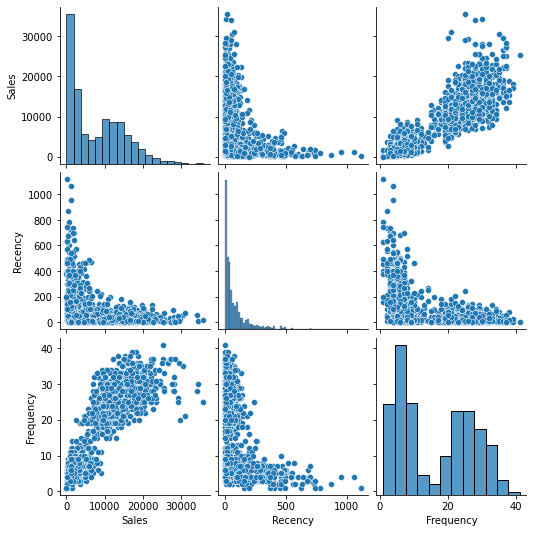

In [13]:
sb.pairplot(data=customers);

In [14]:
#Descriptive Statistics
customers.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,1590.0,7951.259063,6936.570172,7.173,1674.81225,6248.13559,13133.09842,35668.1208
Recency,1590.0,87.616981,127.879879,0.000,14.00000,40.00000,103.00000,1118.0000
Frequency,1590.0,16.196855,10.619199,1.000,6.00000,14.00000,26.00000,41.0000


**Data Modelling**

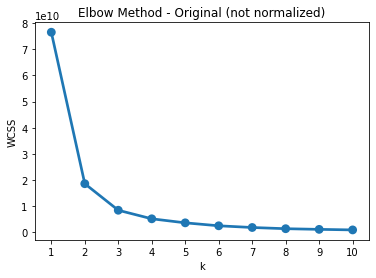

array([6, 4, 8, ..., 5, 9, 2], dtype=int32)

In [15]:
#Using the Elbow Method to identify the most suitable number of cluster to input in the model as a parameter

X = np.array(customers)

wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init='k-means++', max_iter= 300, n_init=10)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.title("Elbow Method - Original (not normalized)")
plt.xlabel('k')
plt.ylabel('WCSS')
sb.pointplot(x=list(range(1,11)),y=wcss)
plt.show()

kmeans.labels_

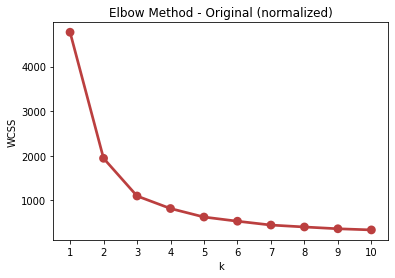

In [16]:
#Normalizing data with Standard Scaler and checking differences in elbow method

std = StandardScaler()

X = std.fit_transform(customers.values)

wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init='k-means++', max_iter= 300, n_init=10)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.title("Elbow Method - Original (normalized)")
plt.xlabel('k')
plt.ylabel('WCSS')
sb.pointplot(x=list(range(1,11)),y=wcss, color='#bb3f3f')
plt.show()


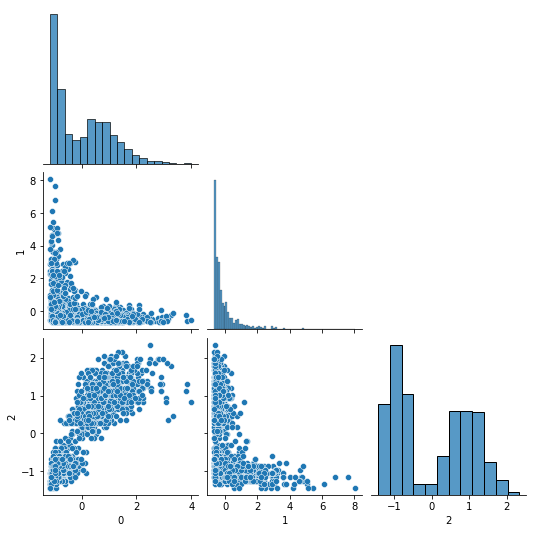

In [17]:
customers_std = pd.DataFrame(X)
sb.pairplot(data= customers_std, corner=True);

In [18]:
#Renaming customer_std columns

customers_std.rename(columns={0:"Sales",1:"Recency",2:"Frequency"}, inplace=True)

In [19]:
#Checking if we have mean = 0 and variance = 1 to each one of variables

print('Standard Deviation:')
print(customers_std.std())
print('             ')
print('Mean:')
print(customers_std.mean())

Standard Deviation:
Sales        1.000315
Recency      1.000315
Frequency    1.000315
dtype: float64
             
Mean:
Sales       -5.367824e-17
Recency      6.340142e-17
Frequency    6.375054e-17
dtype: float64


In [20]:
#Creating the model

model = KMeans(n_clusters= 3, random_state=42)
model.fit(customers_std)

customers['Cluster'] = model.labels_.astype(str)
print(customers['Cluster'].unique())
customers.head()

['0' '1' '2']


,Sales,Recency,Frequency,Cluster
Customer ID,,,,
AA-10315,13747.41300,8,19,0
AA-10375,5884.19500,6,23,0
AA-10480,17695.58978,117,20,0
AA-10645,15343.89070,26,36,0
AA-315,2243.25600,2,7,1


**Data Exploration II**

In [21]:
customers.groupby('Cluster').describe()
# sb.pairplot(data=customers, hue='Cluster', palette='deep')


Sales                                         ... Frequency                  
         count          mean          std         min  ...       25%   50%   75%   max
Cluster                                                ...                            
0        772.0  14059.505835  4834.408869  4629.69556  ...      23.0  26.0  30.0  41.0
1        683.0   2307.474308  1761.943242     7.17300  ...       5.0   7.0   9.0  20.0
2        135.0   1574.507055  1422.629537    19.12800  ...       3.0   4.0   6.0  10.0

[3 rows x 24 columns]

In [22]:
print(f"Segment 0 =", round(len(customers[customers['Cluster']=='0'])/len(customers),2)*100,"%")
print(f"Segment 1 =", round(len(customers[customers['Cluster']=='1'])/len(customers),2)*100,"%")
print(f"Segment 2 =", round(len(customers[customers['Cluster']=='2'])/len(customers),2)*100,"%")
# print(f"Segment 3 =", round(len(customers[customers['Cluster']==3])/len(customers),2)*100,"%")


Segment 0 = 49.0 %
Segment 1 = 43.0 %
Segment 2 = 8.0 %


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

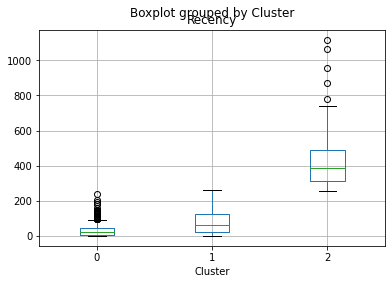

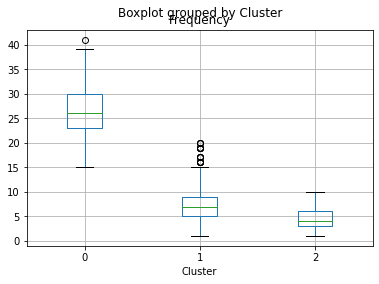

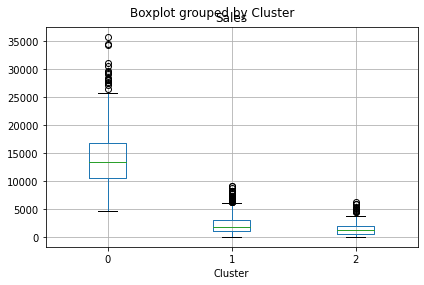

In [23]:
customers.boxplot(column='Recency',by='Cluster')
customers.boxplot(column='Frequency',by='Cluster')
customers.boxplot(column='Sales',by='Cluster')
plt.tight_layout()

**Model Validation**

In [24]:
#Validating with silhouette score

for number_cluster in range(2,10):
  kmeans = KMeans(n_clusters=number_cluster)
  kmeans.fit(customers_std)
  labels = kmeans.labels_
  score = silhouette_score(customers_std,labels)
  print(f'Clusters:{number_cluster}, score:{score:.2f}')

Clusters:2, score:0.58
Clusters:3, score:0.59
Clusters:4, score:0.49
Clusters:5, score:0.46
Clusters:6, score:0.42
Clusters:7, score:0.39
Clusters:8, score:0.35
Clusters:9, score:0.35


In [25]:
#Validating with RFV scores (rating from 1 to 5)

#Dividing values ​​for each variable into 5 frequency ranges, using the 20th percentile

bins_recency =[0,customers.quantile(q=0.2)[1],customers.quantile(q=0.4)[1],customers.quantile(q=0.6)[1],customers.quantile(q=0.8)[1],customers.quantile(q=1)[1]]
group_recency = [5,4,3,2,1]

customers_validation = customers.drop(columns=['Recency','Frequency','Sales'])

customers_validation['Recency_value'] = pd.cut(customers['Recency'],bins_recency,labels=group_recency)

bins_frequency =[0,customers.quantile(q=0.2)[2],customers.quantile(q=0.4)[2],customers.quantile(q=0.6)[2],customers.quantile(q=0.8)[2],customers.quantile(q=1)[2]]
group_frequency_sales = [1,2,3,4,5]
customers_validation['Frequency_value'] = pd.cut(customers['Frequency'],bins_frequency,labels=group_frequency_sales)

bins_sales =[0,customers.quantile(q=0.2)[0],customers.quantile(q=0.4)[0],customers.quantile(q=0.6)[0],customers.quantile(q=0.8)[0],customers.quantile(q=1)[0]]
customers_validation['Sales_value'] = pd.cut(customers['Sales'],bins_sales,labels=group_frequency_sales)

customers_validation.tail()

,Cluster,Recency_value,Frequency_value,Sales_value
Customer ID,,,,
YS-21880,0,5,4,5
ZC-11910,1,1,1,1
ZC-21910,0,5,5,5
ZD-11925,1,5,3,2
ZD-21925,0,5,3,3


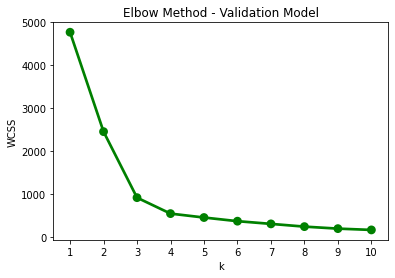

In [26]:
#Using the Elbow Method to identify the most suitable number of clusters to input in the validation model as a parameter

std = StandardScaler()

X2 = std.fit_transform(customers_validation.drop('Cluster',axis=1).values)

wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init='k-means++', max_iter= 300, n_init=10)
  kmeans.fit(X2)
  wcss.append(kmeans.inertia_)

plt.title("Elbow Method - Validation Model")
plt.xlabel('k')
plt.ylabel('WCSS')
sb.pointplot(x=list(range(1,11)),y=wcss, color="green")
plt.show()

In [27]:
#Validation model without normalizing data
validation = KMeans(n_clusters=3, random_state=42)
validation.fit(customers_validation.drop('Cluster',axis=1))
customers_validation['Cluster-Test'] = validation.labels_.astype(str)
customers_validation

#Validation model with data normalized
validation_std = KMeans(n_clusters=3, random_state=42)
validation_std.fit(X2)
X2 = pd.DataFrame(X2)
X2['Cluster-Test'] = validation.labels_.astype(str)
X2.tail()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  This is separate from the ipykernel package so we can avoid doing imports until


,0,1,2,Cluster-Test
1585,0.150027,0.757826,1.414214,0
1586,0.150027,-1.287919,-1.414214,0
1587,0.150027,1.439741,1.414214,0
1588,0.150027,0.075911,-0.707107,0
1589,0.150027,0.075911,0.000000,0


In [28]:
#Comparing results
print('Customer Segmentation (original model):')
print(f"Segment 0 =", round(len(customers_validation[customers_validation['Cluster']=='0'])/len(customers),2)*100,"%")
print(f"Segment 1 =", round(len(customers_validation[customers_validation['Cluster']=='1'])/len(customers),2)*100,"%")
print(f"Segment 2 =", round(len(customers_validation[customers_validation['Cluster']=='2'])/len(customers),2)*100,"%")
print('----------------')
print('Customer Validation (w/o normalized data)')
print(f"Segment 0 =", round(len(customers_validation[customers_validation['Cluster-Test']=='0'])/len(customers),2)*100,"%")
print(f"Segment 1 =", round(len(customers_validation[customers_validation['Cluster-Test']=='1'])/len(customers),2)*100,"%")
print(f"Segment 2 =", round(len(customers_validation[customers_validation['Cluster-Test']=='2'])/len(customers),2)*100,"%")
print('----------------')
print('Customer Validation (w/ Std Scaler)')
print(f"Segment 0 =", round(len(X2[X2['Cluster-Test']=='0'])/len(customers),2)*100,"%")
print(f"Segment 1 =", round(len(X2[X2['Cluster-Test']=='1'])/len(customers),2)*100,"%")
print(f"Segment 2 =", round(len(X2[X2['Cluster-Test']=='2'])/len(customers),2)*100,"%")



Customer Segmentation (original model):
Segment 0 = 49.0 %
Segment 1 = 43.0 %
Segment 2 = 8.0 %
----------------
Customer Validation (w/o normalized data)
Segment 0 = 98.0 %
Segment 1 = 2.0 %
Segment 2 = 0.0 %
----------------
Customer Validation (w/ Std Scaler)
Segment 0 = 98.0 %
Segment 1 = 2.0 %
Segment 2 = 0.0 %


In [41]:
# Analyzing data density on each variable by cluster

In [42]:
def jitter_widget1(jitter=0.1):
  sb.stripplot(x=customers_std.Recency, y='Cluster', data=customers_std, dodge= True, jitter= jitter, size=4, alpha=0.8);

interactive(jitter_widget1, jitter=(0, 0.65, 0.05))

interactive(children=(FloatSlider(value=0.1, description='jitter', max=0.65, step=0.05), Output()), _dom_class…

In [43]:
def jitter_widget2(jitter=0.1):
  sb.stripplot(x=customers_std.Frequency, y= 'Cluster', data=customers_std, dodge= True, jitter= jitter, size=4, alpha=0.8);

interactive(jitter_widget2, jitter=(0, 0.65, 0.05))

interactive(children=(FloatSlider(value=0.1, description='jitter', max=0.65, step=0.05), Output()), _dom_class…

In [44]:
def jitter_widget3(jitter=0.1):
  sb.stripplot(x=customers_std.Sales, y='Cluster', data=customers_std, dodge= True, jitter= jitter, size=4, alpha=0.8);

interactive(jitter_widget3, jitter=(0, 0.65, 0.05))

interactive(children=(FloatSlider(value=0.1, description='jitter', max=0.65, step=0.05), Output()), _dom_class…

,Sales,Recency,Frequency,Cluster
1588,-0.721049,-0.661899,-0.677934,1
1589,0.220363,-0.677544,0.358251,0
1590,0.880863,-0.440838,0.955168,0 centroid
1591,-0.813884,-0.035004,-0.860263,1 centroid
1592,-0.919584,2.698039,-1.109853,2 centroid


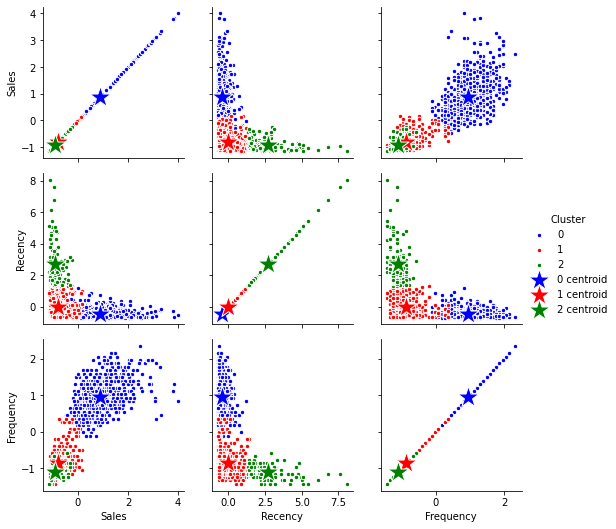

In [33]:
#Visualizing segmentation with centroids of each cluster

customers_std['Cluster'] = model.labels_.astype(str)

centroids = pd.DataFrame(model.cluster_centers_, columns = ['Sales', 'Recency', 'Frequency'])
centroids['Cluster'] = ["0 centroid","1 centroid","2 centroid"]
customers_centroids = pd.concat([customers_std,centroids],ignore_index=True)

g = sb.PairGrid(data=customers_centroids, hue='Cluster',
                hue_order = ["0","1","2","0 centroid","1 centroid","2 centroid"],
                palette = ["b","r","g","b","r","g"],
                hue_kws={"s": [20, 20, 20, 500, 500, 500],
                          "marker": ["o", "o", "o", "*", "*", "*"]})
g.map(plt.scatter, linewidth=1, edgecolor="w")
g.add_legend()

customers_centroids.tail()

In [34]:
#Applying PCA for dimensionality reduction

pca = PCA(n_components = 2)

customers_pca = customers_std.drop('Cluster',axis=1)

pcs = pca.fit_transform(customers_pca)

pcx = pcs[:,0]
pcy = pcs[:,1]

customers_pca['Cluster'] = model.labels_.astype(str)

print("Explained variation per principal component: {}".format(pca.explained_variance_))

Explained variation per principal component: [2.2038034  0.68752096]


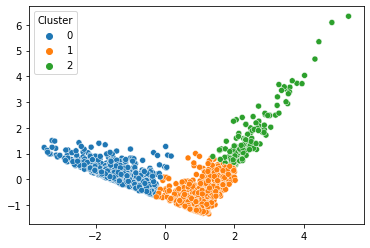

In [35]:
#Visualizing data with PCA

sb.scatterplot(x=pcx, y=pcy, hue=customers_pca['Cluster']);

**Conclusion**

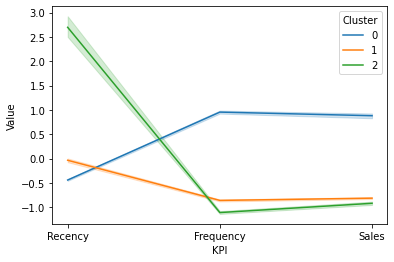

In [36]:
customers_std['Id'] = customers_std.index

customers_conclusion = pd.melt(customers_std,id_vars=['Id','Cluster'], value_vars=['Recency', 'Frequency', 'Sales'], var_name='KPI',value_name='Value')

sb.lineplot(x='KPI', y='Value', hue='Cluster', data=customers_conclusion);

In [37]:
customers.groupby('Cluster').agg({'Recency':['size','median','mean'],'Frequency':'mean','Sales':['mean','sum']}).round(2)

Recency                Frequency     Sales             
           size median    mean      mean      mean          sum
Cluster                                                        
0           772     20   31.26     26.34  14059.51  10853938.50
1           683     64   83.14      7.06   2307.47   1576004.95
2           135    388  432.53      4.41   1574.51    212558.45

In [38]:
#Cluster 0 - Representa maior parcela da base de clientes, possui a menor recência, com a maior frequência de compras, é o grupo de maior representatividade em geração de negócios (receitas) e melhor ticket médio;
#Cluster 1 - É um grupo de clientes que não compra há algum tempo, possui uma menor recorrência de compras, porém o segundo melhor ticket médio ainda que distante das cifras do cluster 1, é um cluster que precisa ser reativado pela empresa;
#Cluster 2 - Representa a menor parcela da base de clientes, com os piores números de engajamento em todos os KPIs, provavelmente são clientes que deixaram ou estão prestes a deixar de fazer negócios com a empresa

**References**

Customer Segmentation in Python, available on:
https://towardsdatascience.com/customer-segmentation-in-python-9c15acf6f945